In [ ]:
#импорт основных библиотек

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#импорт датасета

from google.colab import files 
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
#начальный вид датасета. сразу же кодируем успешный/не успешный магазин значениями 0 и 1 соответственно - это наша задача классификации

df = pd.read_excel('КР2.xlsx', sheet_name='Вар (1)')
df

,Площадь загальна кв.м,Этаж,Количество сотрудников в магазине,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ,Успех
0,9.00,1,1,Соціальний,NaN,571.0,1.56,108.0,13884.0,0,0,0,0,1,0
1,30.00,1,1,Соціальний,8.0,1197.0,2.03,750.0,11700.0,0,0,0,1,1,0
2,15.00,1,1,Соціальний,NaN,402.0,1.81,0.0,6786.0,0,0,0,1,1,0
3,20.00,1,1,Стандартний,NaN,1036.0,2.18,0.0,12948.0,0,0,0,1,1,0
4,30.00,1,1,Соціальний,NaN,513.0,1.63,0.0,11427.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1,3,Преміальний,4.0,6669.0,1.89,963.0,9399.0,0,0,0,0,0,1
65,27.26,1,2,Преміальний,3.0,2877.0,1.85,0.0,14079.0,0,1,1,0,0,1
66,148.91,1,1,Стандартний,12.0,2146.0,1.99,315.0,11427.0,0,0,0,0,0,0
67,50.93,1,2,Соціальний,17.0,413.0,1.73,0.0,13338.0,0,1,1,0,0,0


In [ ]:
#проверка на нулевые значения. Видим, что особенно в этом плане выделяется количество отзывов

df.isna().sum()

Площадь загальна кв.м                  0
Этаж                                   0
Количество сотрудников в магазине      0
Тип                                    0
Кількість відгуків в гуглі            30
Количество чеков                       7
Среднее количество единиц в чеке       7
Населення                              5
Середній дохід наелення,грн            5
Магазин мобільного звязку              0
Продуктовий ринок                      0
Речовий ринок                          0
Транзитна зупинка міжміського ГТ       0
Зупинка ГТ                             0
Успех                                  0
dtype: int64

In [ ]:
#заполним все пропуски, так как у нас достаточно мало данных

dfm = df

from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(dfm[['Кількість відгуків в гуглі']]).round()

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Среднее количество единиц в чеке']] = imputer_mean.fit_transform(dfm[['Среднее количество единиц в чеке']]).round()

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Населення']] = imputer_mean.fit_transform(dfm[['Населення']]).round()

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Середній дохід наелення,грн']] = imputer_mean.fit_transform(dfm[['Середній дохід наелення,грн']]).round()

In [ ]:
#подробная статистика всех переменных. Видим, что у нас есть и бинарные переменные в большом количестве. Далее рассмотрим каждый из параметров более подробно и выберем тот, который будем прогнозировать
#понимаем, что только успешность является интересным параметром для предсказания - например, параметр "магазин мобильной связи" не зависит от остальных факторов
df.describe()

,Площадь загальна кв.м,Этаж,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ,Успех
count,69.000000,69.0,69.000000,69.000000,62.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,1.0,1.869565,42.898551,3018.112903,1.971014,295.956522,11306.855072,0.057971,0.173913,0.130435,0.101449,0.362319,0.362319
std,37.862989,0.0,0.838645,61.280489,2009.425047,0.240772,310.467836,2347.336283,0.235401,0.381812,0.339248,0.304135,0.484192,0.484192
min,4.000000,1.0,1.000000,1.000000,369.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,1.0,1.000000,12.000000,1475.250000,2.000000,0.000000,10296.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,1.0,2.000000,43.000000,2467.000000,2.000000,253.000000,11427.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,1.0,2.000000,43.000000,4103.250000,2.000000,545.000000,12948.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,232.300000,1.0,4.000000,367.000000,7852.000000,3.000000,963.000000,14937.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#для удобства работы необходимо переименовать все колонки, в том числе, чтобы построить графики распределения

df.rename(columns={'Площадь загальна кв.м': 'square'}, inplace=True)
df.rename(columns={'Этаж': 'floor'}, inplace=True)
df.rename(columns={'Количество чеков': 'receipt'}, inplace=True)
df.rename(columns={'Кількість відгуків в гуглі': 'Google_marks'}, inplace=True)
df.rename(columns={'Среднее количество единиц в чеке': 'midQ_receipt'}, inplace=True)
df.rename(columns={'Населення': 'People'}, inplace=True)
df.rename(columns={'Середній дохід наелення,грн': 'mid_income'}, inplace=True)
df.rename(columns={'Магазин мобільного звязку': 'mobile'}, inplace=True)
df.rename(columns={'Продуктовий ринок': 'food_market'}, inplace=True)
df.rename(columns={'Речовий ринок': 'product_market'}, inplace=True)
df.rename(columns={'Транзитна зупинка міжміського ГТ': 'int_stop'}, inplace=True)
df.rename(columns={'Зупинка ГТ': 'city_stop'}, inplace=True)
df.rename(columns={'Тип': 'type'}, inplace=True)
df.rename(columns={'Количество сотрудников в магазине	': 'ds'}, inplace=True)
df.rename(columns={'Успех': 'success'}, inplace=True)

In [ ]:
#проверка типов данных. Один из параметров - текстовый и категориальный, что будет важно в дальнейшем

df.dtypes

square                                float64
floor                                   int64
Количество сотрудников в магазине       int64
type                                   object
Google_marks                          float64
receipt                               float64
midQ_receipt                          float64
People                                float64
mid_income                            float64
mobile                                  int64
food_market                             int64
product_market                          int64
int_stop                                int64
city_stop                               int64
success                                 int64
dtype: object

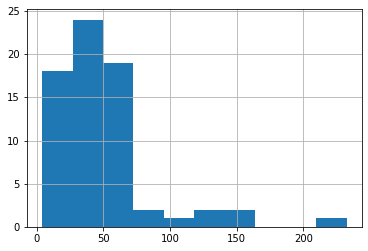

In [ ]:
#распределение площади. По нему видно, что есть небольшой крупный отдельный выброс, который мы удалим без использования дополнительных иструментов

df.square.hist()
df = df.loc[df['square'] < 180]

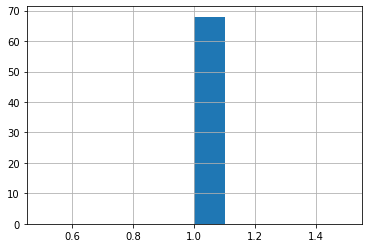

In [ ]:
#переменная, у которой только 1 значение. Очевидно, что не несет никакого смысла
df.floor.hist()

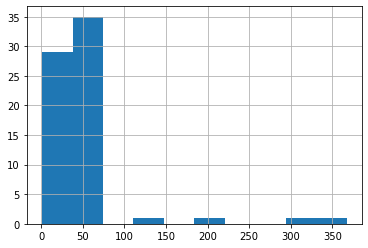

In [ ]:
#несмотря на наличие выбросов, тут они носят логичный характер и, после заполнения пропущенных участков выглядят адекватно. Тем не менее, на мой взгляд, количество отзывов не повлияют на переменную, которую хотелось бы изучить

df.Google_marks.hist()

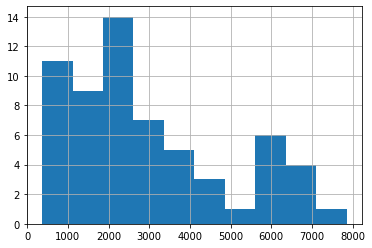

In [ ]:
#переменная, которую мы уже объясняли и которая может сильно влиять на понятие успешности. Нормальное распределение, поэтому конечно берем в модель

df.receipt.hist()

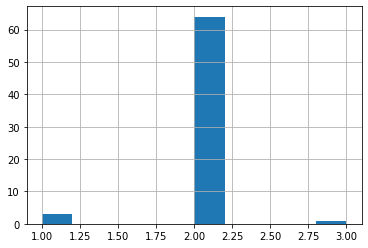

In [ ]:
#бесполезная переменная с парой выбросов. Будет удалена

df.midQ_receipt.hist()

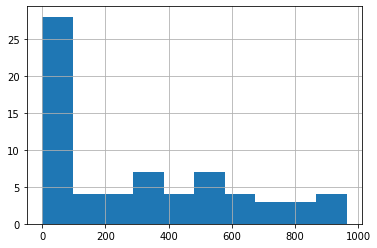

In [ ]:
#Население - ок переменная для анализа с адекватным распределением. Возможно, можно было бы ее логарифмировать, но этого делать не будем

df.People.hist()

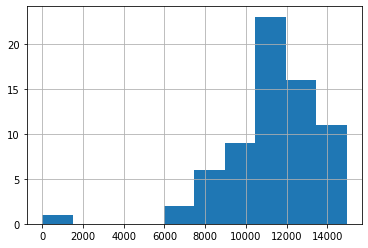

In [ ]:
#средний доход. Одна из ключевых переменных. Удаляем выброс с аномально низким значением и двигаемся дальше.
df.mid_income.hist()
df = df.loc[df['mid_income'] > 5000]

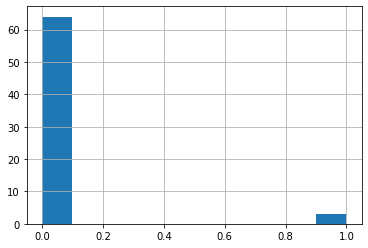

In [ ]:
#бинарная переменная без особого интереса - слишком малое кол-во этих мобильных точек. Будет удалена

df.mobile.hist()

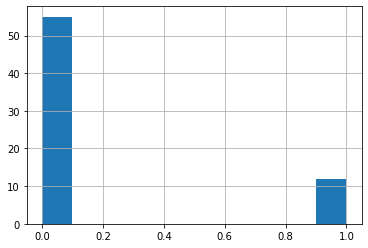

In [ ]:
#бинарная переменная. Оставим для исследования.

df.food_market.hist()

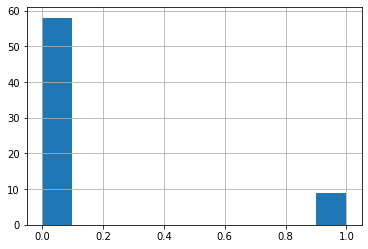

In [ ]:
#бинарная переменная. Оставим для исследования.

df.product_market.hist()

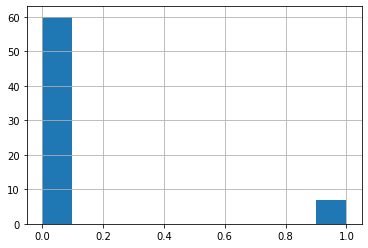

In [ ]:
#бинарная переменная. Все же принял ее оставить, возможно, она достаточно влияет на формирование цены
df.int_stop.hist()

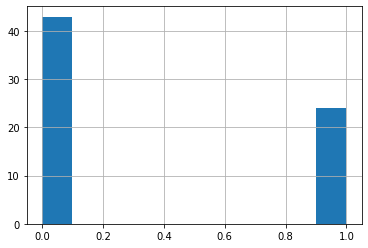

In [ ]:
#хорошая бинарная переменная

df.city_stop.hist()

In [ ]:
#бинарное кодирование категориальной переменной с типом магазина. Тип точно влияет на чек, и мы должны создать отдельные переменные

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # sparse=False categorical_features=...
new_ohe_features = ohe.fit_transform(df.type.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=['type' + str(i) for i in range(new_ohe_features.shape[1])])
df = pd.concat([df, tmp], axis=1)
df

,square,floor,Количество сотрудников в магазине,type,Google_marks,receipt,midQ_receipt,People,mid_income,mobile,food_market,product_market,int_stop,city_stop,success,type0,type1,type2,type3,type4
0,9.00,1.0,1.0,Соціальний,43.0,571.0,2.0,108.0,13884.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,30.00,1.0,1.0,Соціальний,8.0,1197.0,2.0,750.0,11700.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,15.00,1.0,1.0,Соціальний,43.0,402.0,2.0,0.0,6786.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20.00,1.0,1.0,Стандартний,43.0,1036.0,2.0,0.0,12948.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.00,1.0,1.0,Соціальний,43.0,513.0,2.0,0.0,11427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1.0,3.0,Преміальний,4.0,6669.0,2.0,963.0,9399.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
65,27.26,1.0,2.0,Преміальний,3.0,2877.0,2.0,0.0,14079.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
66,148.91,1.0,1.0,Стандартний,12.0,2146.0,2.0,315.0,11427.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67,50.93,1.0,2.0,Соціальний,17.0,413.0,2.0,0.0,13338.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


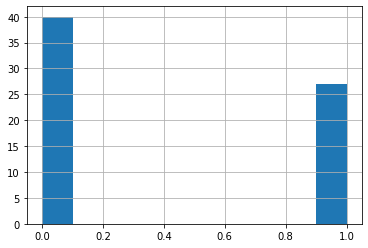

In [ ]:
#бинарная переменная. Оставим для исследования.

df.type0.hist()

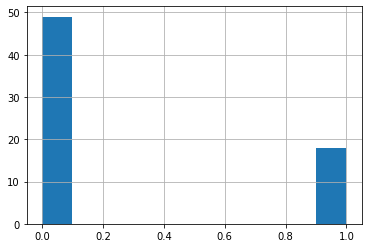

In [ ]:
#бинарная переменная. Оставим для исследования.

df.type1.hist()

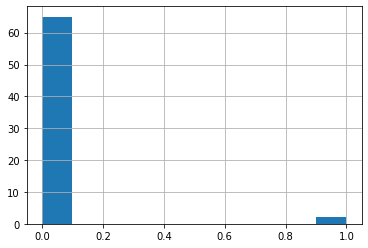

In [ ]:
#бинарная переменная. Слишком редкая и может создать перекос в модели, удаляем

df.type2.hist()

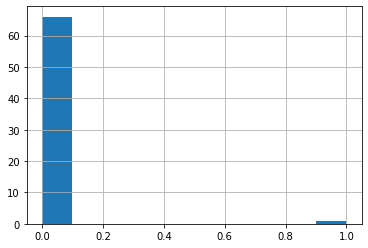

In [ ]:
#бинарная переменная. Слишком редкая и может создать перекос в модели, удаляем. Добавлять им замену не будем, пусть эти типы будут пропущены

df.type3.hist()

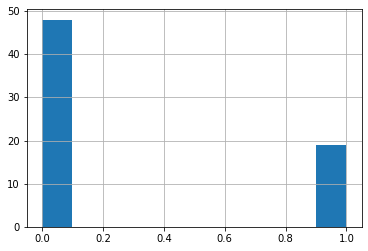

In [ ]:
#бинарная переменная. Оставим для исследования.

df.type4.hist()

In [ ]:
#Удаляем лишние колонки и заполняем 0 пропущенные в категориальных переменных значения(так как оставшиеся 3 магазина не относятся ни к одному из типов)

df = df.drop(columns = ['type3'], );
df = df.drop(columns = ['type2'], );
df = df.drop(columns = ['midQ_receipt'], );
df = df.drop(columns = ['mobile'], );
df = df.drop(columns = ['floor'], );
df = df.drop(columns = ['type'], );
df = df.drop(columns = ['Google_marks'], );
df = df.fillna(0) 

In [ ]:
#поменяем порядок колонок и выделим объясняемую переменную справа

new_order = [0,1,2,3,4,5,6,7,8,10,11,12,9]
df = df[df.columns[new_order]]
df

,square,Количество сотрудников в магазине,receipt,People,mid_income,food_market,product_market,int_stop,city_stop,type0,type1,type4,success
0,9.00,1.0,571.0,108.0,13884.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,30.00,1.0,1197.0,750.0,11700.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,15.00,1.0,402.0,0.0,6786.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,20.00,1.0,1036.0,0.0,12948.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,30.00,1.0,513.0,0.0,11427.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,3.0,6669.0,963.0,9399.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
65,27.26,2.0,2877.0,0.0,14079.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
66,148.91,1.0,2146.0,315.0,11427.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67,50.93,2.0,413.0,0.0,13338.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


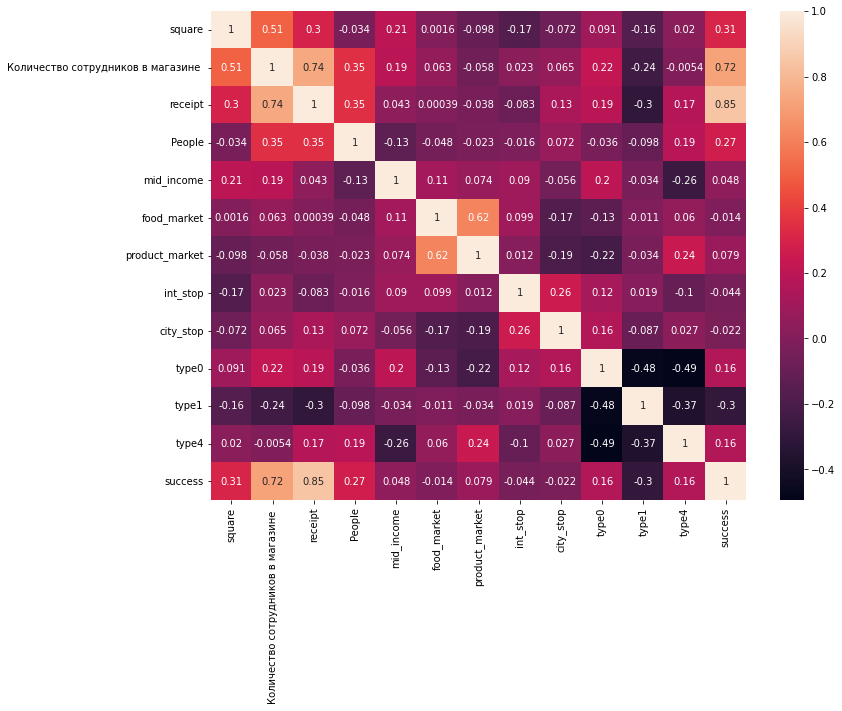

In [ ]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [ ]:
#две переменные имеют слишком большую корреляцию и успехом и поэтому их необходимо убрать, иначе модель выдает ошибку
df = df.drop(columns = ['Количество сотрудников в магазине '], );
df = df.drop(columns = ['receipt'], );

In [ ]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1]
y = df['success']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.565586
         Iterations 6
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.137   
Dependent Variable: success          AIC:              82.2145 
Date:               2021-12-02 12:17 BIC:              102.2878
No. Observations:   55               Log-Likelihood:   -31.107 
Df Model:           9                LL-Null:          -36.051 
Df Residuals:       45               LLR p-value:      0.35959 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1        0.7850     0.3996    1.9644   0.0495    0.0018   1.5682
x2        0.5953     0.3219    1.8492   0.0644   -0.0356   1.2263
x3        0.0894 

In [ ]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

8
[ True  True  True  True  True False False  True  True  True]
[1 1 1 1 1 3 2 1 1 1]


In [ ]:
# Leaving only Selected Features
X_train_select=X_train[:,[True, True , True , True , True, False, False, True, True, True]]
X_test_select=X_test[:,[True, True , True , True , True, False, False, True, True, True]]

In [ ]:
# Fitting Logistic Regression to the Training set (8 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [ ]:
# Predicting the Test set results
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(2)

0.79

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8 2]
 [1 3]]


In [ ]:
# 2 features
X_train = X_train[:,[0,2]]
X_test = X_test[:,[0,2]]

In [ ]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test).round(2)

0.71

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0]
 [ 4  0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


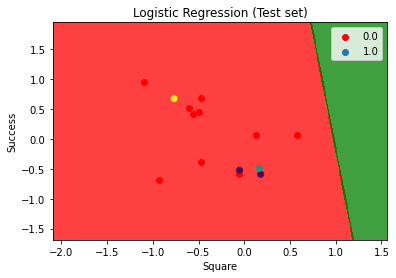

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Square')
plt.ylabel('Success')
plt.legend()
plt.show()

In [ ]:
#видим, что на такой маленькой выборке при большом количестве бинарных параметров модель начинает запутываться. Однако, она выделяет практически все параметры как значимые и дает объясняемость почти в 80%, что неплохо
# тем не менее, для качества параметров нужно учитывать практически все критерии - отношения к типам, наличие остановок, рынков, площадь, количество сотрудников и доход
# большой потерей для качества стало удаление количества чеков и количества сотрудников, ведь в реальной жизни они имеют влияние, но тут получается, что существует прямая корреляция между показателями, из-за чего мы их исключили
# кроме того, модель сильно склонна к отклонению гипотез, что вызывает большое количество ошибок первого рода. Это может говорить как о неравномерности параметра "успех" (он не очень близко к 0,5 в среднем)
# и говорит про то, что модель перестраховывается, что хорошо видно на графике. скорее всего, ее можно улучшить, но данных факторов не совсем достаточно для прогнозирования успешности магазина



In [ ]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(2, activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(2, activation = 'sigmoid'))

# Adding the output layer
cnn.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import sys
sys.setrecursionlimit(10000)

In [ ]:
import tensorflow as tf

In [ ]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/50
1/1 [==============================] - 1s 933ms/step - loss: 0.6534 - accuracy: 0.6364 - val_loss: 0.6479 - val_accuracy: 0.7143
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 0.6532 - accuracy: 0.6364 - val_loss: 0.6475 - val_accuracy: 0.7143
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 0.6529 - accuracy: 0.6364 - val_loss: 0.6470 - val_accuracy: 0.7143
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6527 - accuracy: 0.6364 - val_loss: 0.6466 - val_accuracy: 0.7143
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 0.6525 - accuracy: 0.6364 - val_loss: 0.6462 - val_accuracy: 0.7143
Epoch 6/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6523 - accuracy: 0.6364 - val_loss: 0.6458 - val_accuracy: 0.7143
Epoch 7/50
1/1 [==============================] - 0s 28ms/step - loss: 0.6521 - accuracy: 0.6364 - val_loss: 0.6454 - val_accuracy: 0.7143
Epoch 8/50
1/1 [==========

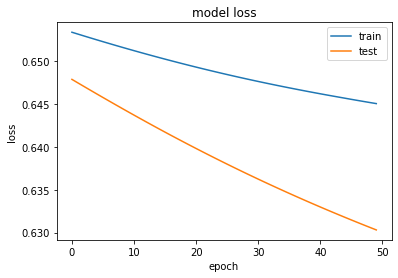

In [ ]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0]
 [ 4  0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


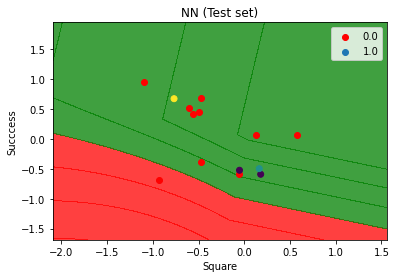

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('Square')
plt.ylabel('Succcess')
plt.legend()
plt.show()

In [ ]:
#можно сказать, что результаты нейронной классификации предельно схожи с результатами того, что мы уже получили. 
#По сути, мы подтверждаем наши догадки в решении данной задачи о недостаточной объясняемости распределения на успех/не успех на имеющихся и возможных для использования данных